In [1]:
import pandas as pd
data_path = '../data/household_power_consumption_hourly_with_anomalies.csv'
df_cleaned = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)
print("Початковий розмір (хвилинні дані):", df_cleaned.shape)

agg_rules = {
    'Global_active_power': 'sum',
    'Global_reactive_power': 'sum',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
}

df_hourly = df_cleaned.resample('H').agg(agg_rules)

print("Розмір після ресемплінгу до годин ('H'):", df_hourly.shape)


df_daily = df_cleaned.resample('D').agg(agg_rules)

print("Розмір після ресемплінгу до днів ('D'):", df_daily.shape)

print("\nПерші 5 рядків годинних даних:")
display(df_hourly.head())

print("\nПерші 5 рядків денних даних:")
display(df_daily.head())

Початковий розмір (хвилинні дані): (34560, 8)
Розмір після ресемплінгу до годин ('H'): (34560, 7)
Розмір після ресемплінгу до днів ('D'): (1441, 7)

Перші 5 рядків годинних даних:


/var/folders/qx/qcg8gq_95sj0ckv67r12b2yw0000gn/T/ipykernel_29720/1912907520.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_cleaned.resample('H').agg(agg_rules)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-17 10:00:00,166.352,10.264,234.446486,19.275676,533.0,1341.0,623.0
2006-12-17 11:00:00,105.120,6.248,235.731622,12.140541,567.0,296.0,630.0
2006-12-17 12:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0
2006-12-17 13:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0
2006-12-17 14:00:00,0.000,0.000,NaN,NaN,0.0,0.0,0.0



Перші 5 рядків денних даних:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-17,525.322,22.130,236.707093,15.354689,2033.0,1637.0,2487.0
2006-12-18,165.682,7.290,237.019339,10.832147,1063.0,16.0,1262.0
2006-12-19,164.718,4.556,235.407063,22.987302,839.0,1234.0,508.0
2006-12-20,0.000,0.000,NaN,NaN,0.0,0.0,0.0
2006-12-21,292.548,10.862,235.998960,15.367780,1765.0,540.0,1375.0


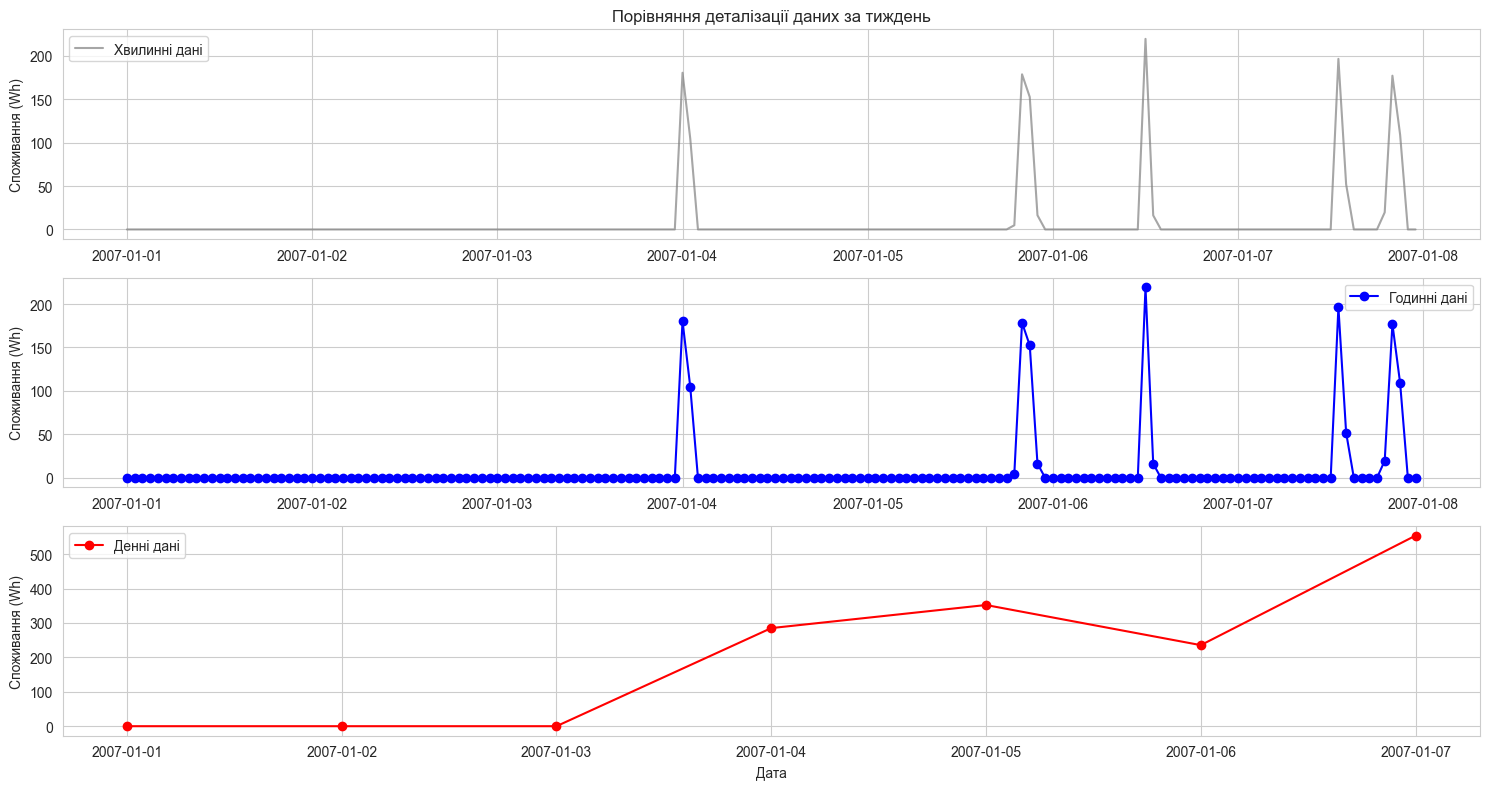

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

sample_week_cleaned = df_cleaned['2007-01-01':'2007-01-07']
sample_week_hourly = df_hourly['2007-01-01':'2007-01-07']
sample_week_daily = df_daily['2007-01-01':'2007-01-07']

plt.subplot(3, 1, 1)
plt.plot(sample_week_cleaned.index, sample_week_cleaned.Global_active_power, label='Хвилинні дані', color='gray', alpha=0.7)
plt.title("Порівняння деталізації даних за тиждень")
plt.ylabel("Споживання (Wh)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sample_week_hourly.index, sample_week_hourly.Global_active_power, label='Годинні дані', color='blue', marker='o', linestyle='-')
plt.ylabel("Споживання (Wh)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sample_week_daily.index, sample_week_daily.Global_active_power, label='Денні дані', color='red', marker='o', linestyle='-')
plt.xlabel("Дата")
plt.ylabel("Споживання (Wh)")
plt.legend()

plt.tight_layout()
plt.show()